In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from extract_features import get_csv
import math

In [2]:
csv_name = "yogawithdrecreated_at869603447.csv"
test_csv = pd.read_csv("~/Desktop/tweet/positive/csv/yogawithdrecreated_at869603447.csv")
test_csv.loc[1:2]

,Unnamed: 0,background_color,created_at,emoji_count,emoticon_count,favorite_count,followers_count,friends_count,is_quote_status,lang,...,listed_count,mention_count,retweet_count,sidebar_border_color,sidebar_fill_color,statues_count,text,text_color,total_favourites_count,truncated
1,1,0,Wed Oct 28 18:00:05 +0000 2015,0,1,0,204,193,False,en,...,44,0,0,0,0,759,yoga is the teacher of yoga yoga is to be unde...,0,81,False
2,2,0,Wed Oct 28 06:35:05 +0000 2015,0,0,0,204,193,False,en,...,44,0,0,0,0,759,the whole technique of yoga its practice and r...,0,81,False


In [3]:
test_csv.loc[:,['created_at','text']]


,created_at,text
0,Thu Oct 29 15:54:12 +0000 2015,at 14 i was diagnosed with attention deficit d...
1,Wed Oct 28 18:00:05 +0000 2015,yoga is the teacher of yoga yoga is to be unde...
2,Wed Oct 28 06:35:05 +0000 2015,the whole technique of yoga its practice and r...
3,Mon Oct 26 13:55:01 +0000 2015,come get your yoga on with this morning at 9 3...
4,Sun Oct 25 13:27:29 +0000 2015,i sure will miss practicing acrobatics and sun...
5,Sat Oct 24 13:12:42 +0000 2015,fun ways to load onto your base a victory danc...
6,Fri Oct 23 16:25:56 +0000 2015,i my students green tree yoga meditation found...
7,Fri Oct 23 12:49:12 +0000 2015,flashbackfriday fbf to a couple weeks ago at c...
8,Fri Oct 23 03:58:31 +0000 2015,anyone who works with me knows that being upri...
9,Thu Oct 22 04:51:45 +0000 2015,hummingbird with and lizzytomber the original ...


In [4]:
import time
import datetime
time_struct2 = time.strptime("Wed Sep 30 13:20:01 +0000 2015","%a %b %d %H:%M:%S +0000 %Y")
time_struct2

time.struct_time(tm_year=2015, tm_mon=9, tm_mday=30, tm_hour=13, tm_min=20, tm_sec=1, tm_wday=2, tm_yday=273, tm_isdst=-1)

[15.]
[15. 18.]
[15. 18.  6.]
[15. 18.  6. 13.]
[15. 18.  6. 13. 13.]
[15. 18.  6. 13. 13. 13.]
[15. 18.  6. 13. 13. 13. 16.]
[15. 18.  6. 13. 13. 13. 16. 12.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21. 17.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21. 17.
 12.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21. 17.
 12. 20.]
[15. 18.  6. 13. 13. 13. 16. 12.  3.  4. 12. 23. 23. 23.  3. 18. 21. 17.
 12. 20. 15.]
[15. 18.  6. 13. 13. 13. 16. 12

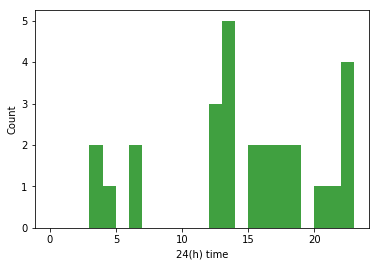

In [6]:
time_list = np.array([])
for time_row in test_csv.created_at:
   
    time_struct = time.strptime(time_row,"%a %b %d %H:%M:%S +0000 %Y")
    
    HMS = int(time.strftime("%H",time_struct))
    
    time_list=np.append(time_list,HMS)
    print(time_list)
plt.hist(time_list,bins=np.arange(0,24,1),facecolor="g",alpha =0.75)
plt.xlabel("24(h) time")
plt.ylabel("Count")
plt.show()

In [6]:
positive_path =get_csv("/Users/charles_tong/Desktop/tweet/positive/csv")
negative_path =get_csv("/Users/charles_tong/Desktop/tweet/negative/csv")
positive_time_toal = 0
positive_time= 0
negative_time_total = 0
negative_time=0
for csv_path in positive_path:
    csv = pd.read_csv(csv_path)

    for time_row in csv.created_at:
        time_struct = time.strptime(time_row,"%a %b %d %H:%M:%S +0000 %Y")
        HMS = int(time.strftime("%H%M%S",time_struct))
        positive_time_toal+=1
        if HMS <=60000 or HMS >= 230000:
            positive_time+=1
            
        ##positive_time=np.append(positive_time,HMS)
    print("P",end="")

for csv_path in negative_path:
    csv = pd.read_csv(csv_path)

    for time_row in csv.created_at:
        time_struct = time.strptime(time_row,"%a %b %d %H:%M:%S +0000 %Y")
        HMS = int(time.strftime("%H%M%S",time_struct))
        negative_time_total+=1
        if HMS <=60000 or HMS >= 230000:
            negative_time+=1
    
        
    print("N",end="")
print("positive time= %d, positive total= %d"%(positive_time,positive_time_toal))
print("negative time= %d, negative total= %d"%(negative_time,negative_time_total))
print("Positive time percentage: %f "%(positive_time*100/positive_time_toal))
print("Negative time percentage: %f "%(negative_time*100/negative_time_total))

'''
plt.hist(time_list,bins=np.arange(0,24,1),facecolor="red",alpha =0.75)
plt.title("Depression user post time distribution")
plt.xlabel("24(h) time")
plt.ylabel("Count")
plt.show()
'''

PPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPP

'\nplt.hist(time_list,bins=np.arange(0,24,1),facecolor="red",alpha =0.75)\nplt.title("Depression user post time distribution")\nplt.xlabel("24(h) time")\nplt.ylabel("Count")\nplt.show()\n'

In [4]:
import pandas as pd
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from sklearn.metrics import classification_report

posData_path = "/Users/charles_tong/Desktop/Depression-detection/positive_model.csv"
negData_path = "/Users/charles_tong/Desktop/Depression-detection/negative_model.csv"

pos_csv = pd.read_csv(posData_path)
neg_csv = pd.read_csv(negData_path)

print(neg_csv.loc[0,:])

Unnamed: 0                                                                0
corpus                     i'm not there so i'm useless lol i love it lm...
emojis                                                             0.841176
emoticons                                                          0.370588
favorites                                                           41.5059
followers                                                              7417
friends_count                                                           512
listed_count                                                             12
mention_count                                                      0.911765
neg_words                                                          0.605882
nightTime_count                                                    0.382353
pos_words                                                           1.10588
retweet_count                                                       683.288
total_favour

In [5]:
''' Random split data in balance'''
from collections import Counter
pos_model = pos_csv.iloc[:,1:15].copy()
#neg_model = neg_csv.iloc[:,1:15].copy()
neg_model = neg_csv.sample(n=pos_model.shape[0]).iloc[:,1:15].copy()
print(pos_model.columns)
# dataset= np.concatenate((pos_model,neg_model))
# target = np.append(np.ones(len(pos_model)),np.zeros(len(neg_model)))

Index(['corpus', 'emojis', 'emoticons', 'favorites', 'followers',
       'friends_count', 'listed_count', 'mention_count', 'neg_words',
       'nightTime_count', 'pos_words', 'retweet_count',
       'total_favourites_count', 'total_post'],
      dtype='object')


# Latent Senmantic Analysis

In [6]:
'''Removing stop words and number in corpus'''
import gensim,logging
from gensim import corpora
from gensim import models
import re
import string
from nltk import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
punctuation = list(string.punctuation)
punctuation.remove("-")
punctuation.remove('_')
long_stop_list = ["a", "a's", "abaft", "able", "aboard", "about", "above", "abst", "accordance", "according", "accordingly", "across", "act", "actually", "added", "adj", "affected", "affecting", "affects", "afore", "aforesaid", "after", "afterwards", "again", "against", "agin", "ago", "ah", "ain't", "aint", "albeit", "all", "allow", "allows", "almost", "alone", "along", "alongside", "already", "also", "although", "always", "am", "american", "amid", "amidst", "among", "amongst", "an", "and", "anent", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "are", "aren", "aren't", "arent", "arise", "around", "as", "aside", "ask", "asking", "aslant", "associated", "astride", "at", "athwart", "auth", "available", "away", "awfully", "b", "back", "bar", "barring", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beneath", "beside", "besides", "best", "better", "between", "betwixt", "beyond", "biol", "both", "brief", "briefly", "but", "by", "c", "c'mon", "c's", "ca", "came", "can", "can't", "cannot", "cant", "cause", "causes", "certain", "certainly", "changes", "circa", "clearly", "close", "co", "com", "come", "comes", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "cos", "could", "couldn", "couldn't", "couldnt", "couldst", "course", "currently", "d", "dare", "dared", "daren", "dares", "daring", "date", "definitely", "described", "despite", "did", "didn", "didn't", "different", "directly", "do", "does", "doesn", "doesn't", "doing", "don", "don't", "done", "dost", "doth", "down", "downwards", "due", "during", "durst", "e", "each", "early", "ed", "edu", "effect", "eg", "eight", "eighty", "either", "else", "elsewhere", "em", "end", "ending", "english", "enough", "entirely", "er", "ere", "especially", "et", "et-al", "etc", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "excepting", "f", "failing", "far", "few", "ff", "fifth", "first", "five", "fix", "followed", "following", "follows", "for", "former", "formerly", "forth", "found", "four", "from", "further", "furthermore", "g", "gave", "get", "gets", "getting", "give", "given", "gives", "giving", "go", "goes", "going", "gone", "gonna", "got", "gotta", "gotten", "greetings", "h", "had", "hadn", "hadn't", "happens", "hard", "hardly", "has", "hasn", "hasn't", "hast", "hath", "have", "haven", "haven't", "having", "he", "he'd", "he'll", "he's", "hed", "hello", "help", "hence", "her", "here", "here's", "hereafter", "hereby", "herein", "heres", "hereupon", "hers", "herself", "hes", "hi", "hid", "high", "him", "himself", "his", "hither", "home", "hopefully", "how", "how's", "howbeit", "however", "hundred", "i", "i'd", "i'll", "i'm", "i've", "id", "ie", "if", "ignored", "ill", "im", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "inside", "insofar", "instantly", "instead", "into", "invention", "inward", "is", "isn", "isn't", "it", "it'd", "it'll", "it's", "itd", "its", "itself", "j", "just", "k", "keep", "keeps", "kept", "kg", "km", "know", "known", "knows", "l", "large", "largely", "last", "lately", "later", "latter", "latterly", "least", "left", "less", "lest", "let", "let's", "lets", "like", "liked", "likely", "likewise", "line", "little", "living", "ll", "long", "look", "looking", "looks", "ltd", "m", "made", "mainly", "make", "makes", "many", "may", "maybe", "mayn", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "mid", "midst", "might", "mightn", "million", "mine", "minus", "miss", "ml", "more", "moreover", "most", "mostly", "mr", "mrs", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "na", "name", "namely", "nay", "nd", "near", "nearly", "neath", "necessarily", "necessary", "need", "needed", "needing", "needn", "needs", "neither", "never", "nevertheless", "new", "next", "nigh", "nigher", "nighest", "nine", "ninety", "nisi", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "notwithstanding", "novel", "now", "nowhere", "o", "obtain", "obtained", "obviously", "of", "off", "often", "oh", "ok", "okay", "old", "omitted", "on", "once", "one", "ones", "oneself", "only", "onto", "open", "or", "ord", "other", "others", "otherwise", "ought", "oughtn", "our", "ours", "ourselves", "out", "outside", "over", "overall", "owing", "own", "p", "page", "pages", "part", "particular", "particularly", "past", "pending", "per", "perhaps", "placed", "please", "plus", "poorly", "possible", "possibly", "potentially", "pp", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provided", "provides", "providing", "public", "put", "q", "qua", "que", "quickly", "quite", "qv", "r", "ran", "rather", "rd", "re", "readily", "real", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "respecting", "respectively", "resulted", "resulting", "results", "right", "round", "run", "s", "said", "same", "sans", "save", "saving", "saw", "say", "saying", "says", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "shall", "shalt", "shan", "shan't", "she", "she'd", "she'll", "she's", "shed", "shell", "shes", "short", "should", "shouldn", "shouldn't", "show", "showed", "shown", "showns", "shows", "significant", "significantly", "similar", "similarly", "since", "six", "slightly", "small", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "special", "specifically", "specified", "specify", "specifying", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "summat", "sup", "supposing", "sure", "t", "t's", "take", "taken", "taking", "tell", "tends", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "that's", "that've", "thats", "the", "thee", "their", "theirs", "them", "themselves", "then", "thence", "there", "there'll", "there's", "there've", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", "thereupon", "these", "they", "they'd", "they'll", "they're", "they've", "theyd", "theyre", "thine", "think", "third", "this", "tho", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "thro", "throug", "through", "throughout", "thru", "thus", "thyself", "til", "till", "tip", "to", "today", "together", "too", "took", "touching", "toward", "towards", "tried", "tries", "true", "truly", "try", "trying", "ts", "twas", "tween", "twere", "twice", "twill", "twixt", "two", "twould", "u", "un", "under", "underneath", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "up", "upon", "ups", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "v", "value", "various", "ve", "versus", "very", "via", "vice", "vis-a-vis", "viz", "vol", "vols", "vs", "w", "wanna", "want", "wanting", "wants", "was", "wasn", "wasn't", "wasnt", "way", "we", "we'd", "we'll", "we're", "we've", "wed", "welcome", "well", "went", "were", "weren", "weren't", "werent", "wert", "what", "what'll", "what's", "whatever", "whats", "when", "when's", "whence", "whencesoever", "whenever", "where", "where's", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "whichever", "whichsoever", "while", "whilst", "whim", "whither", "who", "who'll", "who's", "whod", "whoever", "whole", "whom", "whomever", "whore", "whos", "whose", "whoso", "whosoever", "why", "why's", "widely", "will", "willing", "wish", "with", "within", "without", "won't", "wonder", "wont", "words", "world", "would", "wouldn", "wouldn't", "wouldnt", "wouldst", "www", "x", "y", "ye", "yes", "yet", "you", "you'd", "you'll", "you're", "you've", "youd", "your", "youre", "yours", "yourself", "yourselves", "z", "zero"]
stop_lists =  long_stop_list+punctuation

tokenizer = TweetTokenizer()
pos_corpus = pos_model.corpus.copy()
neg_corpus = neg_model.corpus.copy()
pos_doc = []
neg_doc = []
# supply with Stemming
def Stemming(non_stop_token):
    stemmer = SnowballStemmer("english")
    stem_result = [stemmer.stem(word) for word in non_stop_token]
    return stem_result

for index,text in enumerate(pos_corpus):
    non_number_text = re.sub(r'[\d]+',' ',str(text))
    text_token = tokenizer.tokenize(non_number_text)
    non_stop_token = [word for word in text_token if word not in stop_lists]
    pos_doc.append(Stemming(non_stop_token))
    
    print('pos: %d'%index)
print('pos corpus complete')

for index,text in enumerate(neg_corpus):
    
    non_number_text = re.sub(r'[\d]+',' ',str(text))
    text_token = tokenizer.tokenize(non_number_text)
    
    non_stop_token = [word for word in text_token if word not in stop_lists]
    neg_doc.append(Stemming(non_stop_token))

    
    print('neg: %d'%index)
print('neg corpus complete')
    
    



pos: 0
pos: 1
pos: 2
pos: 3
pos: 4
pos: 5
pos: 6
pos: 7
pos: 8
pos: 9
pos: 10
pos: 11
pos: 12
pos: 13
pos: 14
pos: 15
pos: 16
pos: 17
pos: 18
pos: 19
pos: 20
pos: 21
pos: 22
pos: 23
pos: 24
pos: 25
pos: 26
pos: 27
pos: 28
pos: 29
pos: 30
pos: 31
pos: 32
pos: 33
pos: 34
pos: 35
pos: 36
pos: 37
pos: 38
pos: 39
pos: 40
pos: 41
pos: 42
pos: 43
pos: 44
pos: 45
pos: 46
pos: 47
pos: 48
pos: 49
pos: 50
pos: 51
pos: 52
pos: 53
pos: 54
pos: 55
pos: 56
pos: 57
pos: 58
pos: 59
pos: 60
pos: 61
pos: 62
pos: 63
pos: 64
pos: 65
pos: 66
pos: 67
pos: 68
pos: 69
pos: 70
pos: 71
pos: 72
pos: 73
pos: 74
pos: 75
pos: 76
pos: 77
pos: 78
pos: 79
pos: 80
pos: 81
pos: 82
pos: 83
pos: 84
pos: 85
pos: 86
pos: 87
pos: 88
pos: 89
pos: 90
pos: 91
pos: 92
pos: 93
pos: 94
pos: 95
pos: 96
pos: 97
pos: 98
pos: 99
pos: 100
pos: 101
pos: 102
pos: 103
pos: 104
pos: 105
pos: 106
pos: 107
pos: 108
pos: 109
pos: 110
pos: 111
pos: 112
pos: 113
pos: 114
pos: 115
pos: 116
pos: 117
pos: 118
pos: 119
pos: 120
pos: 121
pos: 122
pos

pos: 928
pos: 929
pos: 930
pos: 931
pos: 932
pos: 933
pos: 934
pos: 935
pos: 936
pos: 937
pos: 938
pos: 939
pos: 940
pos: 941
pos: 942
pos: 943
pos: 944
pos: 945
pos: 946
pos: 947
pos: 948
pos: 949
pos: 950
pos: 951
pos: 952
pos: 953
pos: 954
pos: 955
pos: 956
pos: 957
pos: 958
pos: 959
pos: 960
pos: 961
pos: 962
pos: 963
pos: 964
pos: 965
pos: 966
pos: 967
pos: 968
pos: 969
pos: 970
pos: 971
pos: 972
pos: 973
pos: 974
pos: 975
pos: 976
pos: 977
pos: 978
pos: 979
pos: 980
pos: 981
pos: 982
pos: 983
pos: 984
pos: 985
pos: 986
pos: 987
pos: 988
pos: 989
pos: 990
pos: 991
pos: 992
pos: 993
pos: 994
pos: 995
pos: 996
pos: 997
pos: 998
pos: 999
pos: 1000
pos: 1001
pos: 1002
pos: 1003
pos: 1004
pos: 1005
pos: 1006
pos: 1007
pos: 1008
pos: 1009
pos: 1010
pos: 1011
pos: 1012
pos: 1013
pos: 1014
pos: 1015
pos: 1016
pos: 1017
pos: 1018
pos: 1019
pos: 1020
pos: 1021
pos: 1022
pos: 1023
pos: 1024
pos: 1025
pos: 1026
pos: 1027
pos: 1028
pos: 1029
pos: 1030
pos: 1031
pos: 1032
pos: 1033
pos: 1034
po

pos: 1757
pos: 1758
pos: 1759
pos: 1760
pos: 1761
pos: 1762
pos: 1763
pos: 1764
pos: 1765
pos: 1766
pos: 1767
pos: 1768
pos: 1769
pos: 1770
pos: 1771
pos: 1772
pos: 1773
pos: 1774
pos: 1775
pos: 1776
pos: 1777
pos: 1778
pos: 1779
pos: 1780
pos: 1781
pos: 1782
pos: 1783
pos: 1784
pos: 1785
pos: 1786
pos: 1787
pos: 1788
pos: 1789
pos: 1790
pos: 1791
pos: 1792
pos: 1793
pos: 1794
pos: 1795
pos: 1796
pos: 1797
pos: 1798
pos: 1799
pos: 1800
pos: 1801
pos: 1802
pos: 1803
pos: 1804
pos: 1805
pos: 1806
pos: 1807
pos: 1808
pos: 1809
pos: 1810
pos: 1811
pos: 1812
pos: 1813
pos: 1814
pos: 1815
pos: 1816
pos: 1817
pos: 1818
pos: 1819
pos: 1820
pos: 1821
pos: 1822
pos: 1823
pos: 1824
pos: 1825
pos: 1826
pos: 1827
pos: 1828
pos: 1829
pos: 1830
pos: 1831
pos: 1832
pos: 1833
pos: 1834
pos: 1835
pos: 1836
pos: 1837
pos: 1838
pos: 1839
pos: 1840
pos: 1841
pos: 1842
pos: 1843
pos: 1844
pos: 1845
pos: 1846
pos: 1847
pos: 1848
pos: 1849
pos: 1850
pos: 1851
pos: 1852
pos: 1853
pos: 1854
pos: 1855
pos: 1856


neg: 217
neg: 218
neg: 219
neg: 220
neg: 221
neg: 222
neg: 223
neg: 224
neg: 225
neg: 226
neg: 227
neg: 228
neg: 229
neg: 230
neg: 231
neg: 232
neg: 233
neg: 234
neg: 235
neg: 236
neg: 237
neg: 238
neg: 239
neg: 240
neg: 241
neg: 242
neg: 243
neg: 244
neg: 245
neg: 246
neg: 247
neg: 248
neg: 249
neg: 250
neg: 251
neg: 252
neg: 253
neg: 254
neg: 255
neg: 256
neg: 257
neg: 258
neg: 259
neg: 260
neg: 261
neg: 262
neg: 263
neg: 264
neg: 265
neg: 266
neg: 267
neg: 268
neg: 269
neg: 270
neg: 271
neg: 272
neg: 273
neg: 274
neg: 275
neg: 276
neg: 277
neg: 278
neg: 279
neg: 280
neg: 281
neg: 282
neg: 283
neg: 284
neg: 285
neg: 286
neg: 287
neg: 288
neg: 289
neg: 290
neg: 291
neg: 292
neg: 293
neg: 294
neg: 295
neg: 296
neg: 297
neg: 298
neg: 299
neg: 300
neg: 301
neg: 302
neg: 303
neg: 304
neg: 305
neg: 306
neg: 307
neg: 308
neg: 309
neg: 310
neg: 311
neg: 312
neg: 313
neg: 314
neg: 315
neg: 316
neg: 317
neg: 318
neg: 319
neg: 320
neg: 321
neg: 322
neg: 323
neg: 324
neg: 325
neg: 326
neg: 327
n

neg: 1120
neg: 1121
neg: 1122
neg: 1123
neg: 1124
neg: 1125
neg: 1126
neg: 1127
neg: 1128
neg: 1129
neg: 1130
neg: 1131
neg: 1132
neg: 1133
neg: 1134
neg: 1135
neg: 1136
neg: 1137
neg: 1138
neg: 1139
neg: 1140
neg: 1141
neg: 1142
neg: 1143
neg: 1144
neg: 1145
neg: 1146
neg: 1147
neg: 1148
neg: 1149
neg: 1150
neg: 1151
neg: 1152
neg: 1153
neg: 1154
neg: 1155
neg: 1156
neg: 1157
neg: 1158
neg: 1159
neg: 1160
neg: 1161
neg: 1162
neg: 1163
neg: 1164
neg: 1165
neg: 1166
neg: 1167
neg: 1168
neg: 1169
neg: 1170
neg: 1171
neg: 1172
neg: 1173
neg: 1174
neg: 1175
neg: 1176
neg: 1177
neg: 1178
neg: 1179
neg: 1180
neg: 1181
neg: 1182
neg: 1183
neg: 1184
neg: 1185
neg: 1186
neg: 1187
neg: 1188
neg: 1189
neg: 1190
neg: 1191
neg: 1192
neg: 1193
neg: 1194
neg: 1195
neg: 1196
neg: 1197
neg: 1198
neg: 1199
neg: 1200
neg: 1201
neg: 1202
neg: 1203
neg: 1204
neg: 1205
neg: 1206
neg: 1207
neg: 1208
neg: 1209
neg: 1210
neg: 1211
neg: 1212
neg: 1213
neg: 1214
neg: 1215
neg: 1216
neg: 1217
neg: 1218
neg: 1219


neg: 1941
neg: 1942
neg: 1943
neg: 1944
neg: 1945
neg: 1946
neg: 1947
neg: 1948
neg: 1949
neg: 1950
neg: 1951
neg: 1952
neg: 1953
neg: 1954
neg: 1955
neg: 1956
neg: 1957
neg: 1958
neg: 1959
neg: 1960
neg: 1961
neg: 1962
neg: 1963
neg: 1964
neg: 1965
neg: 1966
neg: 1967
neg: 1968
neg: 1969
neg: 1970
neg: 1971
neg: 1972
neg: 1973
neg: 1974
neg: 1975
neg: 1976
neg: 1977
neg: 1978
neg: 1979
neg: 1980
neg: 1981
neg: 1982
neg: 1983
neg: 1984
neg: 1985
neg: 1986
neg: 1987
neg: 1988
neg: 1989
neg: 1990
neg: 1991
neg: 1992
neg: 1993
neg: 1994
neg: 1995
neg: 1996
neg: 1997
neg: 1998
neg: 1999
neg: 2000
neg: 2001
neg: 2002
neg: 2003
neg: 2004
neg: 2005
neg: 2006
neg: 2007
neg: 2008
neg: 2009
neg: 2010
neg: 2011
neg: 2012
neg: 2013
neg: 2014
neg: 2015
neg: 2016
neg: 2017
neg: 2018
neg: 2019
neg: 2020
neg: 2021
neg: 2022
neg: 2023
neg: 2024
neg: 2025
neg: 2026
neg: 2027
neg: 2028
neg: 2029
neg: 2030
neg: 2031
neg: 2032
neg: 2033
neg: 2034
neg: 2035
neg: 2036
neg: 2037
neg: 2038
neg: 2039
neg: 2040


In [7]:

data = pos_doc+neg_doc
dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(doc) for doc in data]
num_topics = 25
lda = models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
print('LDA finish')

2018-05-11 09:08:14,015 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-11 09:08:22,873 : INFO : built Dictionary(224406 unique tokens: ['abou', 'absurd', 'abus', 'academ', 'account']...) from 4780 documents (total 8679862 corpus positions)
2018-05-11 09:08:29,107 : INFO : using symmetric alpha at 0.04
2018-05-11 09:08:29,112 : INFO : using symmetric eta at 0.04
2018-05-11 09:08:29,166 : INFO : using serial LDA version on this node
2018-05-11 09:09:02,238 : INFO : running online (single-pass) LDA training, 25 topics, 1 passes over the supplied corpus of 4780 documents, updating model once every 2000 documents, evaluating perplexity every 4780 documents, iterating 50x with a convergence threshold of 0.001000
2018-05-11 09:09:02,241 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-05-11 09:09:02,248 : INFO : PROGRESS: pass 0, at document #2000/4780
2018-05-11 09:09:10,376 : INF

LDA finish


In [8]:
'''15 topics '''
rows_num = len(pos_doc) + len(neg_doc)
topic_feature = np.zeros((rows_num,25))
for row,topic in enumerate(lda[corpus]):
    for col,topic_pro in topic:
        topic_feature[row][col]=topic_pro
print('finish')

finish


In [9]:
target = np.append(np.ones(len(pos_doc)),np.zeros(len(neg_doc)))
print(target.shape)
X_topic_train, X_topic_test, y_topic_train, y_topic_test = train_test_split(topic_feature,target,train_size=0.6)

(4780,)


/Users/charles_tong/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
lda.print_topics(num_topics=10,num_words=10)

2018-05-11 09:10:09,818 : INFO : topic #15 (0.040): 0.016*"seo" + 0.011*"upwork" + 0.007*"york" + 0.007*"websit" + 0.006*"posit" + 0.005*"link" + 0.004*"modiministri" + 0.004*"india" + 0.004*"peopl" + 0.004*"market"
2018-05-11 09:10:09,824 : INFO : topic #9 (0.040): 0.009*"amp" + 0.007*"peopl" + 0.006*"year" + 0.006*"time" + 0.005*"good" + 0.005*"video" + 0.005*"love" + 0.004*"day" + 0.004*"thing" + 0.003*"life"
2018-05-11 09:10:09,830 : INFO : topic #18 (0.040): 0.010*"love" + 0.009*"amp" + 0.007*"good" + 0.007*"music" + 0.006*"peopl" + 0.005*"time" + 0.005*"happi" + 0.004*"video" + 0.004*"hiphop" + 0.004*"year"
2018-05-11 09:10:09,835 : INFO : topic #10 (0.040): 0.012*"peopl" + 0.009*"good" + 0.007*"thing" + 0.006*"time" + 0.006*"love" + 0.006*"feel" + 0.006*"day" + 0.005*"life" + 0.005*"pig" + 0.005*"girl"
2018-05-11 09:10:09,839 : INFO : topic #2 (0.040): 0.031*"naomibot" + 0.009*"love" + 0.009*"art" + 0.007*"hot_pcy_pict" + 0.006*"livejasmin" + 0.006*"lt" + 0.005*"gay" + 0.005*"fu

[(15,
  '0.016*"seo" + 0.011*"upwork" + 0.007*"york" + 0.007*"websit" + 0.006*"posit" + 0.005*"link" + 0.004*"modiministri" + 0.004*"india" + 0.004*"peopl" + 0.004*"market"'),
 (9,
  '0.009*"amp" + 0.007*"peopl" + 0.006*"year" + 0.006*"time" + 0.005*"good" + 0.005*"video" + 0.005*"love" + 0.004*"day" + 0.004*"thing" + 0.003*"life"'),
 (18,
  '0.010*"love" + 0.009*"amp" + 0.007*"good" + 0.007*"music" + 0.006*"peopl" + 0.005*"time" + 0.005*"happi" + 0.004*"video" + 0.004*"hiphop" + 0.004*"year"'),
 (10,
  '0.012*"peopl" + 0.009*"good" + 0.007*"thing" + 0.006*"time" + 0.006*"love" + 0.006*"feel" + 0.006*"day" + 0.005*"life" + 0.005*"pig" + 0.005*"girl"'),
 (2,
  '0.031*"naomibot" + 0.009*"love" + 0.009*"art" + 0.007*"hot_pcy_pict" + 0.006*"livejasmin" + 0.006*"lt" + 0.005*"gay" + 0.005*"fuck" + 0.005*"check" + 0.005*"peopl"'),
 (11,
  '0.008*"peopl" + 0.007*"time" + 0.007*"year" + 0.007*"love" + 0.006*"lol" + 0.006*"thing" + 0.005*"good" + 0.005*"day" + 0.005*"fuck" + 0.005*"work"'),
 (3,

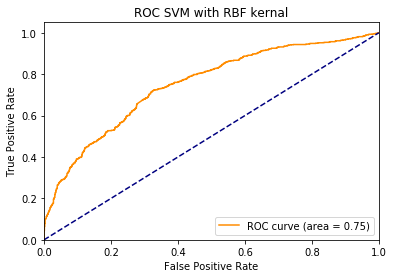

In [11]:
## SVM
from sklearn.metrics import roc_curve,auc
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
svc = svm.SVC(kernel='rbf',C=0.9,gamma=0.125,probability=True,decision_function_shape='ovo')
svc.fit(X_topic_train,y_topic_train)
predict_pro = svc.predict_proba(X_topic_test)

fpr, tpr,thresholds = roc_curve(y_topic_test,predict_pro[:,1], pos_label=1)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC SVM with RBF kernal')
plt.legend(loc="lower right")
plt.show()

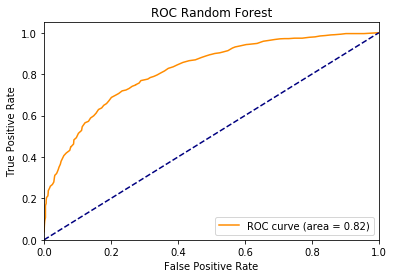

In [12]:
## Random Forest
from sklearn.metrics import roc_curve,auc
from sklearn.ensemble import RandomForestClassifier

random_forest= RandomForestClassifier(n_estimators =100, oob_score=True)
random_forest.fit(X_topic_train,y_topic_train)
RF_pred = random_forest.predict_proba(X_topic_test)

fpr, tpr,thresholds = roc_curve(y_topic_test,RF_pred[:,1], pos_label=1)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Random Forest')
plt.legend(loc="lower right")
plt.show()

# Origin 13 features text in different classifier

In [13]:
# combine 13 feature with topic feature of LDA
pos_array= np.array(pos_model.iloc[:,1:14])
neg_array =  np.array(neg_model.iloc[:,1:14])
new_array= np.concatenate((pos_array,neg_array))
target = np.append(np.ones(len(pos_model)),np.zeros(len(neg_model)))
set_rows = len(topic_feature)
set_cols = new_array.shape[1]+topic_feature.shape[1]
dataset = np.zeros((set_rows,set_cols))
for index,row in enumerate(new_array):
    dataset[index] = np.append(row,topic_feature[index])
print(dataset.shape)

X_train, X_test, y_train, y_test = train_test_split(dataset,target,train_size=0.6)


(4780, 38)


/Users/charles_tong/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [42]:
cd ~/Desktop/Depression-Detection/Random-Forest

/Users/charles_tong/Desktop/Depression-detection/Random-Forest


In [43]:
import randomforest
import time
import math
import importlib
importlib.reload(randomforest)

<module 'randomforest' from '/Users/charles_tong/Desktop/Depression-detection/Random-Forest/randomforest.cpython-36m-darwin.so'>

In [ ]:
'Own Random Forest'
start_time = time.clock()

train_data = np.insert(X_train,38,y_train,axis=1)
print(train_data.shape)
random_forest = randomforest.create_forest(train_data, n_trees=100,max_depth=20,sample_size=1.0,n_feature=int(math.sqrt(train_data.shape[1]-1)),min_size=1)
predictions = random_forest.predict(X_test)

correct=0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        correct += 1
    
    

print("Ratio Correct:", correct / len(predictions))

print('Execute time: %f'%(time.clock()-start_time))

(2868, 39)


In [ ]:
predictions = random_forest.predict(X_test)

correct=0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        correct += 1
    
    

print("Ratio Correct:", correct / len(predictions))
print(classification_report(y_pred=predictions,y_true=y_test))
pre_pro = random_forest.predict_pro(X_test,n_classes=2)

## pre_pro fist row is [0,0,0]
fpr, tpr,thresholds = roc_curve(y_test,pre_pro[1:,1], pos_label=1)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='red',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Own Random Forest')
plt.legend(loc="lower right")
plt.show()

In [38]:
cd ~/Desktop/Depression-detection


/Users/charles_tong/Desktop/Depression-detection


In [39]:
from LR_tree import evaluate_algorithm,loadDataSet,random_forest
from random import seed, randrange, random
import numpy as np
import time

In [40]:
'Own RF by python'

#dataset = loadDataSet('/Users/charles_tong/Downloads/sonar-all-data.txt')
    # print dataset
start_time = time.clock()
n_folds = 3        # 分成5份数据，进行交叉验证
max_depth = 20     # 调参（自己修改） #决策树深度不能太深，不然容易导致过拟合
min_size = 1       # 决策树的叶子节点最少的元素数量
sample_size = 1.0  # 做决策树时候的样本的比例
# n_features = int((len(dataset[0])-1))
train_data = np.insert(dataset,38,target,axis=1)
n_features = int(math.sqrt(dataset.shape[1]))     # 调参（自己修改） #准确性与多样性之间的权衡
for n_trees in [10]:  # 理论上树是越多越好
    scores = evaluate_algorithm(train_data, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
    # 每一次执行本文件时都能产生同一个随机数
    seed(1)
    print ('random=', random())
    print ('Trees: %d' % n_trees)
    print ('Scores: %s' % scores)
    print ('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))
print('Execute time: %f'%(time.clock()-start_time))

(3, 1594, 39)
[0.031746031746031744, 0.3492063492063492, 0.047619047619047616, 1264.0, 596.0, 1.0, 0.8253968253968254, 0.6984126984126984, 0.0, 1.2142857142857142, 5.4444444444444455, 2178.0, 126.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.33919981122016907, 0.0, 0.0, 0.6557889580726624, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, None]
[0.0, 0.0, 0.09479553903345724, 56.0, 5.0, 0.0, 0.016728624535315983, 0.7230483271375465, 0.3736059479553903, 0.7955390334572491, 0.03903345724907063, 7.0, 538.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2873738408088684, 0.7121666073799133, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, None]
[1.0248756218905473, 0.681592039800995, 1.6218905472636815, 113.0, 114.0, 3.0, 0.8656716417910447, 0.5572139303482587, 0.4776119402985074, 1.0746268656716418, 107.5223880597015, 2268.0, 201.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.019715681672096252, 0.0, 0.28627169132232666, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.61

[0.5760233918128655, 0.19639376218323587, 0.041910331384015585, 1445.0, 1293.0, 4.0, 0.7017543859649122, 0.6028265107212476, 0.4239766081871345, 0.9249512670565302, 2674.4610136452247, 967.0, 2052.0, 0.0, 0.010090111754834652, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03458379954099655, 0.0, 0.08848460018634796, 0.0, 0.0, 0.861456036567688, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, None]
[0.625, 0.20833333333333331, 2.9166666666666665, 962.0, 573.0, 5.0, 1.0208333333333333, 0.5208333333333334, 0.3958333333333333, 0.8958333333333334, 5404.854166666667, 20326.0, 48.0, 0.04000181332230568, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9542482495307922, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, None]
[0.31666666666666665, 0.25, 0.2, 233.0, 175.0, 15.0, 1.0833333333333333, 1.05, 0.16666666666666666, 1.5333333333333334, 589.5666666666667, 120.0, 60.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3336736261844635, 0.0, 0.12538719177246094, 0.0, 0.533036172389

[0.0, 0.09302325581395347, 0.02325581395348837, 387.0, 365.0, 89.0, 0.0, 0.4837209302325581, 0.34418604651162793, 0.9906976744186048, 0.0372093023255814, 8.0, 215.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9986647963523865, None]
[0.0, 0.2727272727272727, 0.3545454545454545, 704.0, 402.0, 50.0, 0.7272727272727273, 0.6363636363636364, 0.01818181818181818, 1.490909090909091, 36.98181818181817, 3887.0, 110.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6170550584793091, 0.0, 0.037183210253715515, 0.0, 0.0, 0.0, 0.08957057446241379, 0.0, 0.0, 0.0, 0.0, 0.16297170519828796, 0.0, 0.0, 0.0, 0.08835417777299881, None]
[0.0, 0.40425531914893614, 0.0, 254.0, 782.0, 0.0, 0.0, 0.8936170212765957, 0.3404255319148936, 1.574468085106383, 0.0, 0.0, 47.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5275737047195435, 0.0, 0.0, 0.0, 0.3831661641597748, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.038271401077508926, 0.0, 0.03259159252047539, 0.0

6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6

6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6

finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
f

6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6

6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6

6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6

6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6

6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6
finish
6

In [ ]:
'Bagging of Logistic Regression'
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
## Bagging + Decision tree = Random Forest
bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=100,max_features=0.6,max_samples=0.6,oob_score=True)
bagging.fit(X_train,y_train)
bagging_pred= bagging.predict(X_test)
bagging_pro = bagging.predict_proba(X_test)

print (classification_report(y_true=y_test,y_pred=bagging_pred))
print(bagging.score(X_test,y_test))
fpr, tpr,_ = roc_curve(y_test,bagging_pro[:,1], pos_label=1)
roc_auc= auc(fpr,tpr)
#base_estimator =  BaggingClassifier(base_estimator=LogisticRegression(),n_estimators=30,max_features=0.6,max_samples=0.6)
##Boosting + Logistic Regression
boost_LR = AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=100)
boost_LR.fit(X_train,y_train)
boost_LR_prob = boost_LR.predict_proba(X_test)
fpr_boost, tpr_boost,_ = roc_curve(y_test,boost_LR_prob[:,1], pos_label=1)
roc_auc_boost = auc(fpr_boost, tpr_boost)
##Extremely tree
extra_tree = ExtraTreesClassifier(n_estimators=100)
extra_tree.fit(X_train,y_train)
ET_prob = extra_tree.predict_proba(X_test)
fpr_ET, tpr_ET,_ = roc_curve(y_test,ET_prob[:,1], pos_label=1)
roc_auc_ET = auc(fpr_ET, tpr_ET)


plt.figure(1)
plt.plot(fpr, tpr, color='darkorange',
         label='Bagging+DT (area = %0.2f)' % roc_auc)
plt.plot(fpr_boost, tpr_boost, color='blue',
         label='Boost+LR (area = %0.2f)' % roc_auc_boost)
plt.plot(fpr_ET, tpr_ET, color='red',
         label='ET (area = %0.2f)' % roc_auc_ET)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Bagging of LR')
plt.legend(loc="lower right")
plt.show()

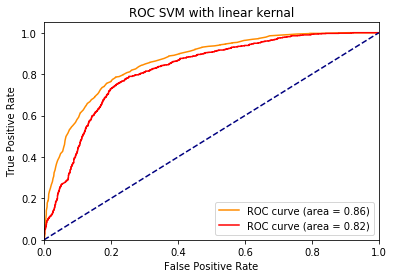

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,
                                                            y_train,
                                                            test_size=0.5)
# Unsupervised transformation based on totally random trees
n_estimator = 100
rt = RandomTreesEmbedding(max_depth=3, n_estimators=n_estimator,
    random_state=0)

rt_lm = LogisticRegression()
pipeline = make_pipeline(rt, bagging)
pipeline.fit(X_train, y_train)
y_pred_rt = pipeline.predict_proba(X_test)[:, 1]
fpr_rt_lm, tpr_rt_lm, _ = roc_curve(y_test, y_pred_rt)

# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)

rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)
y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)



plt.figure(1)
plt.plot(fpr_rt_lm, tpr_rt_lm, color='darkorange',
         label='ROC curve (area = %0.2f)' % auc(fpr_rt_lm,tpr_rt_lm))
plt.plot(fpr_rf_lm, tpr_rf_lm, color='red',
         label='ROC curve (area = %0.2f)' % auc(fpr_rf_lm,tpr_rf_lm))
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC SVM with linear kernal')
plt.legend(loc="best")
plt.show()


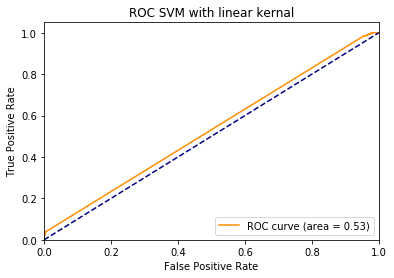

In [244]:
'''Classifier: LinearSVC'''
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve,auc
from sklearn import svm
Classifier_svm_lin = svm.SVC(kernel='rbf',C=0.9,gamma=0.125,probability=True,decision_function_shape='ovo')
Classifier_svm_lin.fit(X_train,y_train)
lin_pred = Classifier_svm_lin.predict_proba(X_test)

##ROC
fpr, tpr,thresholds = roc_curve(y_test,lin_pred[:,1], pos_label=1)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC SVM with linear kernal')
plt.legend(loc="lower right")
plt.show()

             precision    recall  f1-score   support

        0.0       0.80      0.86      0.83      1783
        1.0       0.70      0.60      0.64       964

avg / total       0.76      0.77      0.76      2747

0.7688387331634511


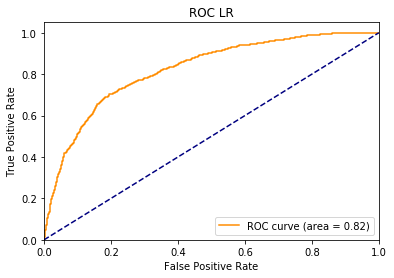

In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
LR_pro = LR.predict_proba(X_test)
LR_pred = LR.predict(X_test)
print (classification_report(y_true=y_test,y_pred=LR_pred))
print(LR.score(X_test,y_test))
fpr, tpr,thresholds = roc_curve(y_test,LR_pro[:,1], pos_label=1)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC LR')
plt.legend(loc="lower right")
plt.show()

             precision    recall  f1-score   support

        0.0       0.72      0.74      0.73       936
        1.0       0.74      0.72      0.73       976

avg / total       0.73      0.73      0.73      1912

Accuracy: 0.729603


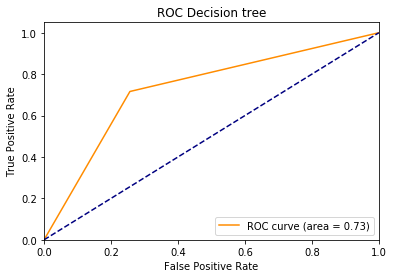

In [20]:
'''Classifier : Decision tree'''
from sklearn import tree
classifier_tree = tree.DecisionTreeClassifier()
classifier_tree.fit(X_train,y_train)
tree_pred=classifier_tree.predict(X_test)
print (classification_report(y_true=y_test,y_pred=tree_pred))
##ROC
print('Accuracy: %f'%(classifier_tree.score(X_test,y_test)))
tree_pred_num = classifier_tree.predict_proba(X_test)

fpr, tpr,_ = roc_curve(y_test,tree_pred_num[:,1], pos_label=1)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.clf
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Decision tree')
plt.legend(loc="lower right")
plt.show()



In [38]:
## Decision tree Graph
import graphviz
path ='/Users/charles_tong/Desktop/Depression-detection/tree.dot'
 
dot_data = tree.export_graphviz(classifier_tree, out_file=None, 
                             feature_names=np.array(pos_csv.columns[1:14]),  
                             class_names=np.array(['depression','normal']),  
                             filled=True, rounded=True,  
                             special_characters=True)
graph = graphviz.Source(dot_data)
    
graph

ValueError: Length of feature_names, 13 does not match number of features, 38

             precision    recall  f1-score   support

        0.0       0.66      0.97      0.78      1800
        1.0       0.40      0.04      0.07       947

avg / total       0.57      0.65      0.54      2747

Accuracy: 0.648708


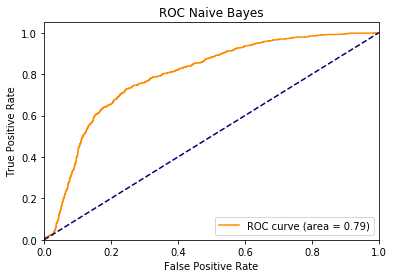

In [232]:
'''Classifier : Naive Bayes'''
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train,y_train)
NB_pred=classifier_NB.predict(X_test)
print (classification_report(y_true=y_test,y_pred=NB_pred))
print('Accuracy: %f'%(classifier_NB.score(X_test,y_test)))
##ROC
NB_pred = classifier_NB.predict_proba(X_test)
NB_pred = NB_pred[:,1]
fpr, tpr,thresholds = roc_curve(y_test,NB_pred, pos_label=1)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Naive Bayes')
plt.legend(loc="lower right")
plt.show()

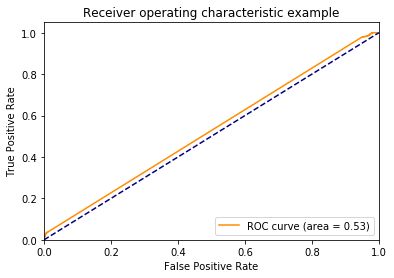

In [233]:
'''Classifier : SVM with RBF kernel'''
from sklearn.metrics import roc_curve,auc
SVM_rbf = svm.SVC(kernel='rbf',C=0.9,gamma=0.125,probability=True,decision_function_shape='ovo')
SVM_rbf.fit(X_train,y_train)
y_score= SVM_rbf.predict_proba(X_test)
fpr, tpr,thresholds = roc_curve(y_test,y_score[:,1], pos_label=1)
roc_auc= auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


/Users/charles_tong/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Counter({1.0: 1435, 0.0: 1433})
             precision    recall  f1-score   support

        0.0       0.80      0.82      0.81       957
        1.0       0.81      0.80      0.81       955

avg / total       0.81      0.81      0.81      1912

Accuracy: 0.809100


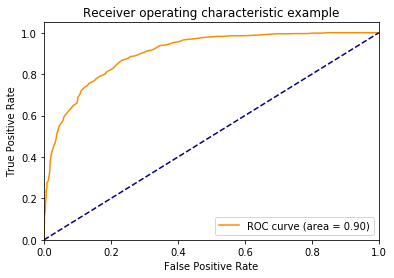

In [24]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(dataset,target,train_size=0.6)
print(Counter(y_train))
random_forest= RandomForestClassifier(n_estimators =100, oob_score=True,criterion='entropy',max_features=int(math.sqrt(38)))
random_forest.fit(X_train,y_train)
RF_pred_num = random_forest.predict(X_test)
print (classification_report(y_true=y_test,y_pred=RF_pred_num))
RF_pred = random_forest.predict_proba(X_test)
print('Accuracy: %f'%(random_forest.score(X_test,y_test)))
fpr, tpr,thresholds = roc_curve(y_test,RF_pred[:,1], pos_label=1)
roc_auc= auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy' ,linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

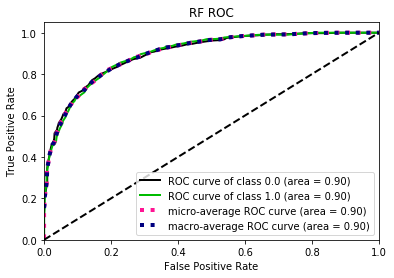

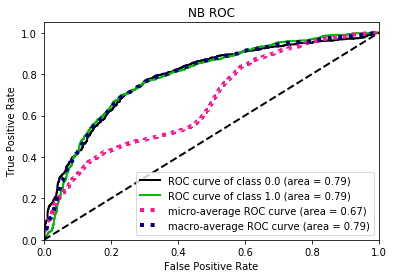

In [21]:
import scikitplot as sckplt
sckplt.metrics.plot_roc_curve(y_test,RF_pred,title="RF ROC")

NB_pred = classifier_NB.predict_proba(X_test)
sckplt.metrics.plot_roc_curve(y_test,NB_pred,title="NB ROC")
plt.show()

[ 5  1  2  4  3  6 11  0  8  9  7 10 12]


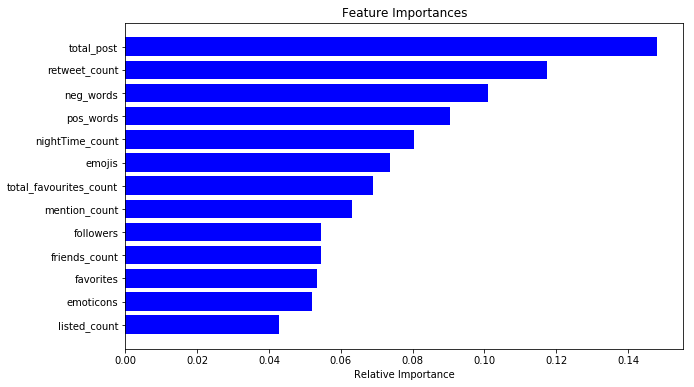

In [65]:
importances = random_forest.feature_importances_

indices = np.argsort(importances)
print(indices)
cols_name= pos_csv.columns

cols = [cols_name[x+2] for x in indices]
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), cols)
plt.xlabel('Relative Importance')
plt.show()

/Users/charles_tong/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


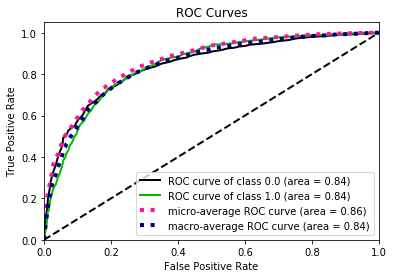

[0 1 3 2 4]


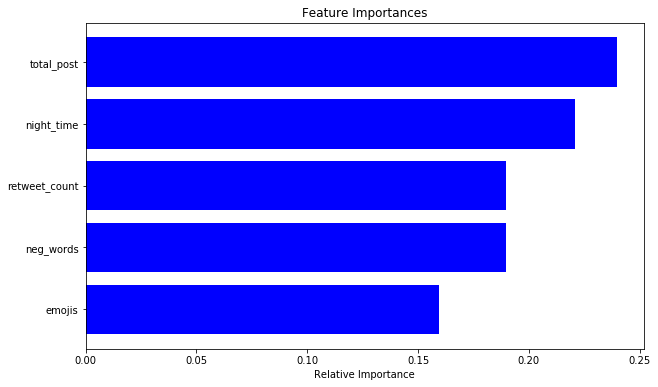

In [35]:
##Different combination of features (Max importance )
X_train, X_test, y_train, y_test = train_test_split(dataset[:,(0,7,8,10,12)],target,train_size=0.6)
random_forest= RandomForestClassifier(n_estimators =100, oob_score=True)
random_forest.fit(X_train,y_train)

RF_prob = random_forest.predict_proba(X_test)
sckplt.metrics.plot_roc_curve(y_test,RF_prob)
plt.show()


importances = random_forest.feature_importances_
indices = np.argsort(importances)
print(indices)
cols_name= ["emojis","neg_words","night_time","retweet_count","total_post"]

cols = [cols_name[x] for x in indices]
plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), cols)
plt.xlabel('Relative Importance')
plt.show()

In [44]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# create sample documents
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 

# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)
print(ldamodel.print_topics(num_topics=3, num_words=10))


[(0, '0.125*"health" + 0.050*"expert" + 0.050*"blood" + 0.050*"caus" + 0.050*"suggest" + 0.050*"increas" + 0.050*"tension" + 0.050*"may" + 0.050*"profession" + 0.050*"say"'), (1, '0.059*"drive" + 0.059*"pressur" + 0.059*"seem" + 0.059*"perform" + 0.059*"better" + 0.059*"often" + 0.059*"well" + 0.059*"feel" + 0.059*"school" + 0.059*"never"'), (2, '0.082*"good" + 0.082*"brocolli" + 0.081*"brother" + 0.081*"mother" + 0.081*"eat" + 0.046*"like" + 0.046*"around" + 0.046*"time" + 0.046*"lot" + 0.046*"spend"')]
False


In [6]:
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer


def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None


def lemmatize_sentence(sentence):
    res = []
    lemmatizer = WordNetLemmatizer()
    for word, pos in pos_tag(word_tokenize(sentence)):
        wordnet_pos = get_wordnet_pos(pos) or wordnet.NOUN
        print(wordnet_pos)
        res.append(lemmatizer.lemmatize(word, pos=wordnet_pos))
    
    return res
print (lemmatize_sentence("Hello, I am kidding lucky"))

n
n
n
v
v
n
['Hello', ',', 'I', 'be', 'kid', 'lucky']


In [66]:
#!/usr/bin/python
# coding:utf8

'''
Created 2017-04-25
Update  on 2017-05-18
Random Forest Algorithm on Sonar Dataset
Author: Flying_sfeng/片刻
GitHub: https://github.com/apachecn/MachineLearning
---
源代码网址：http://www.tuicool.com/articles/iiUfeim
Flying_sfeng博客地址：http://blog.csdn.net/flying_sfeng/article/details/64133822 (感谢作者贡献)
'''
from __future__ import print_function
from random import seed, randrange, random

# 导入csv文件
def loadDataSet(filename):
    dataset = []
    with open(filename, 'r') as fr:
        for line in fr.readlines():
            if not line:
                continue
            lineArr = []
            for featrue in line.split(','):
                # strip()返回移除字符串头尾指定的字符生成的新字符串
                str_f = featrue.strip()

                # isdigit 如果是浮点型数值，就是 false，所以换成 isalpha() 函数
                # if str_f.isdigit():   # 判断是否是数字
                if str_f.isalpha():     # 如果是字母，说明是标签
                    # 添加分类标签
                    lineArr.append(str_f)
                else:
                    # 将数据集的第column列转换成float形式
                    lineArr.append(float(str_f))
            dataset.append(lineArr)
    return dataset


def cross_validation_split(dataset, n_folds):
    """cross_validation_split(将数据集进行抽重抽样 n_folds 份，数据可以重复重复抽取，每一次list的元素是无重复的)

    Args:
        dataset     原始数据集
        n_folds     数据集dataset分成n_flods份
    Returns:
        dataset_split    list集合，存放的是：将数据集进行抽重抽样 n_folds 份，数据可以重复重复抽取，每一次list的元素是无重复的
    """
    dataset_split = list()
    dataset_copy = list(dataset)       # 复制一份 dataset,防止 dataset 的内容改变
    fold_size = len(dataset) / n_folds
    for i in range(n_folds):
        fold = list()                  # 每次循环 fold 清零，防止重复导入 dataset_split
        while len(fold) < fold_size:   # 这里不能用 if，if 只是在第一次判断时起作用，while 执行循环，直到条件不成立
            # 有放回的随机采样，有一些样本被重复采样，从而在训练集中多次出现，有的则从未在训练集中出现，此则自助采样法。从而保证每棵决策树训练集的差异性
            index = randrange(len(dataset_copy))
            # 将对应索引 index 的内容从 dataset_copy 中导出，并将该内容从 dataset_copy 中删除。
            # pop() 函数用于移除列表中的一个元素（默认最后一个元素），并且返回该元素的值。
            # fold.append(dataset_copy.pop(index))  # 无放回的方式
            fold.append(dataset_copy[index])  # 有放回的方式
        dataset_split.append(fold)
    # 由dataset分割出的n_folds个数据构成的列表，为了用于交叉验证
    return dataset_split


# Split a dataset based on an attribute and an attribute value # 根据特征和特征值分割数据集
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right


'''
Gini指数的计算问题，假如将原始数据集D切割两部分，分别为D1和D2，则
Gini(D|切割) = (|D1|/|D| ) * Gini(D1) + (|D2|/|D|) * Gini(D2)
学习地址：http://bbs.pinggu.org/thread-5986969-1-1.html
而原文中 计算方式为：
Gini(D|切割) = Gini(D1) + Gini(D2)

# Calculate the Gini index for a split dataset
def gini_index(groups, class_values):    # 个人理解：计算代价，分类越准确，则 gini 越小
    gini = 0.0
    for class_value in class_values:     # class_values = [0, 1] 
        for group in groups:             # groups = (left, right)
            size = len(group)
            if size == 0:
                continue
            proportion = [row[-1] for row in group].count(class_value) / float(size)
            gini += (proportion * (1.0 - proportion))    # 个人理解：计算代价，分类越准确，则 gini 越小
    return gini
'''


def gini_index(groups, class_values):    # 个人理解：计算代价，分类越准确，则 gini 越小
    gini = 0.0
    D = len(groups[0]) + len(groups[1])
    for class_value in class_values:     # class_values = [0, 1]
        for group in groups:             # groups = (left, right)
            size = len(group)
            if size == 0:
                continue
            proportion = [row[-1] for row in group].count(class_value) / float(size)
            gini += float(size)/D * (proportion * (1.0 - proportion))    # 个人理解：计算代价，分类越准确，则 gini 越小
    return gini


# 找出分割数据集的最优特征，得到最优的特征 index，特征值 row[index]，以及分割完的数据 groups（left, right）
def get_split(dataset, n_features):
    class_values = list(set(row[-1] for row in dataset))  # class_values =[0, 1]
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    features = list()
    while len(features) < n_features:
        index = randrange(len(dataset[0])-1)  # 往 features 添加 n_features 个特征（ n_feature 等于特征数的根号），特征索引从 dataset 中随机取
        if index not in features:
            features.append(index)
    for index in features:                    # 在 n_features 个特征中选出最优的特征索引，并没有遍历所有特征，从而保证了每课决策树的差异性
        for row in dataset:
            groups = test_split(index, row[index], dataset)  # groups=(left, right), row[index] 遍历每一行 index 索引下的特征值作为分类值 value, 找出最优的分类特征和特征值
            gini = gini_index(groups, class_values)
            # 左右两边的数量越一样，说明数据区分度不高，gini系数越大
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups  # 最后得到最优的分类特征 b_index,分类特征值 b_value,分类结果 b_groups。b_value 为分错的代价成本
    # print b_score
    return {'index': b_index, 'value': b_value, 'groups': b_groups}


# Create a terminal node value # 输出group中出现次数较多的标签
def to_terminal(group):
    outcomes = [row[-1] for row in group]           # max() 函数中，当 key 参数不为空时，就以 key 的函数对象为判断的标准
    return max(set(outcomes), key=outcomes.count)   # 输出 group 中出现次数较多的标签


# Create child splits for a node or make terminal  # 创建子分割器，递归分类，直到分类结束
def split(node, max_depth, min_size, n_features, depth):  # max_depth = 10, min_size = 1, n_features = int(sqrt((dataset[0])-1))
    left, right = node['groups']
    del(node['groups'])
# check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
# check for max depth
    if depth >= max_depth:   # max_depth=10 表示递归十次，若分类还未结束，则选取数据中分类标签较多的作为结果，使分类提前结束，防止过拟合
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
# process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left, n_features)  # node['left']是一个字典，形式为{'index':b_index, 'value':b_value, 'groups':b_groups}，所以node是一个多层字典
        split(node['left'], max_depth, min_size, n_features, depth+1)  # 递归，depth+1计算递归层数
# process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right, n_features)
        split(node['right'], max_depth, min_size, n_features, depth+1)


# Build a decision tree
def build_tree(train, max_depth, min_size, n_features):
    """build_tree(创建一个决策树)

    Args:
        train           训练数据集
        max_depth       决策树深度不能太深，不然容易导致过拟合
        min_size        叶子节点的大小
        n_features      选取的特征的个数
    Returns:
        root            返回决策树
    """

    # 返回最优列和相关的信息
    root = get_split(train, n_features)

    # 对左右2边的数据 进行递归的调用，由于最优特征使用过，所以在后面进行使用的时候，就没有意义了
    # 例如： 性别-男女，对男使用这一特征就没任何意义了
    split(root, max_depth, min_size, n_features, 1)
    return root


# Make a prediction with a decision tree
def predict(node, row):   # 预测模型分类结果
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):       # isinstance 是 Python 中的一个内建函数。是用来判断一个对象是否是一个已知的类型。
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']


# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
    """bagging_predict(bagging预测)

    Args:
        trees           决策树的集合
        row             测试数据集的每一行数据
    Returns:
        返回随机森林中，决策树结果出现次数做大的
    """

    # 使用多个决策树trees对测试集test的第row行进行预测，再使用简单投票法判断出该行所属分类
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)


# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):   # 创建数据集的随机子样本
    """random_forest(评估算法性能，返回模型得分)

    Args:
        dataset         训练数据集
        ratio           训练数据集的样本比例
    Returns:
        sample          随机抽样的训练样本
    """

    sample = list()
    # 训练样本的按比例抽样。
    # round() 方法返回浮点数x的四舍五入值。
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        # 有放回的随机采样，有一些样本被重复采样，从而在训练集中多次出现，有的则从未在训练集中出现，此则自助采样法。从而保证每棵决策树训练集的差异性
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample


# Random Forest Algorithm
def random_forest(train, test, max_depth, min_size, sample_size, n_trees, n_features):
    """random_forest(评估算法性能，返回模型得分)

    Args:
        train           训练数据集
        test            测试数据集
        max_depth       决策树深度不能太深，不然容易导致过拟合
        min_size        叶子节点的大小
        sample_size     训练数据集的样本比例
        n_trees         决策树的个数
        n_features      选取的特征的个数
    Returns:
        predictions     每一行的预测结果，bagging 预测最后的分类结果
    """

    trees = list()
    # n_trees 表示决策树的数量
    for i in range(n_trees):
        print('create trees')
        # 随机抽样的训练样本， 随机采样保证了每棵决策树训练集的差异性
        sample = subsample(train, sample_size)
        # 创建一个决策树
        tree = build_tree(sample, max_depth, min_size, n_features)
        trees.append(tree)
        print('finish')

    # 每一行的预测结果，bagging 预测最后的分类结果
    predictions = [bagging_predict(trees, row) for row in test]
    return predictions


# Calculate accuracy percentage
def accuracy_metric(actual, predicted):  # 导入实际值和预测值，计算精确度
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0


# 评估算法性能，返回模型得分
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    """evaluate_algorithm(评估算法性能，返回模型得分)

    Args:
        dataset     原始数据集
        algorithm   使用的算法
        n_folds     数据的份数
        *args       其他的参数
    Returns:
        scores      模型得分
    """

    # 将数据集进行抽重抽样 n_folds 份，数据可以重复重复抽取，每一次 list 的元素是无重复的
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    print(folds[1])
    # 每次循环从 folds 从取出一个 fold 作为测试集，其余作为训练集，遍历整个 folds ，实现交叉验证
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        # 将多个 fold 列表组合成一个 train_set 列表, 类似 union all
        """
        In [20]: l1=[[1, 2, 'a'], [11, 22, 'b']]
        In [21]: l2=[[3, 4, 'c'], [33, 44, 'd']]
        In [22]: l=[]
        In [23]: l.append(l1)
        In [24]: l.append(l2)
        In [25]: l
        Out[25]: [[[1, 2, 'a'], [11, 22, 'b']], [[3, 4, 'c'], [33, 44, 'd']]]
        In [26]: sum(l, [])
        Out[26]: [[1, 2, 'a'], [11, 22, 'b'], [3, 4, 'c'], [33, 44, 'd']]
        """
        train_set = sum(train_set, [])
        test_set = list()
        # fold 表示从原始数据集 dataset 提取出来的测试集
        for row in fold:
            row_copy = list(row)
            row_copy[-1] = None
            test_set.append(row_copy)
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]

        # 计算随机森林的预测结果的正确率
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores


if __name__ == '__main__':

    # 加载数据
    
    # print dataset
    dataset = np.insert(dataset,38,target,axis=1)
    print(dataset)
    n_folds = 5        # 分成5份数据，进行交叉验证
    max_depth = 20     # 调参（自己修改） #决策树深度不能太深，不然容易导致过拟合
    min_size = 1       # 决策树的叶子节点最少的元素数量
    sample_size = 1.0  # 做决策树时候的样本的比例
    # n_features = int((len(dataset[0])-1))
    n_features = 15     # 调参（自己修改） #准确性与多样性之间的权衡
    for n_trees in [1]:  # 理论上树是越多越好
        scores = evaluate_algorithm(dataset, random_forest, n_folds, max_depth, min_size, sample_size, n_trees, n_features)
        # 每一次执行本文件时都能产生同一个随机数
        seed(1)
        print ('random=', random())
        print ('Trees: %d' % n_trees)
        print ('Scores: %s' % scores)
        print ('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))


[[0.         0.25       0.54310345 ... 1.         1.         1.        ]
 [0.         0.18518519 0.22222222 ... 1.         1.         1.        ]
 [0.56666667 0.56666667 0.26666667 ... 1.         1.         1.        ]
 ...
 [0.         0.31460674 0.1011236  ... 0.         0.         0.        ]
 [0.         0.17073171 0.02439024 ... 0.         0.         0.        ]
 [0.03030303 0.30578512 1.04683196 ... 0.         0.         0.        ]]
[array([0.00000000e+00, 2.07865169e-01, 1.68539326e-01, 1.85600000e+03,
       2.14000000e+02, 0.00000000e+00, 5.33707865e-01, 7.80898876e-01,
       2.92134831e-01, 1.75280899e+00, 1.57303371e-01, 1.18800000e+03,
       1.78000000e+02, 6.50544018e-02, 4.35289383e-01, 0.00000000e+00,
       7.82157555e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.39370577e-02,
       0.00000000e+00, 3.52299064e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.0

finish


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()